<a href="https://colab.research.google.com/github/nanfeng/note/blob/master/tensorflow/1_classafication_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0-rc1'

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0-rc1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 0.25.3
sklearn 0.22.2.post1
tensorflow 2.2.0-rc1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_train_all = tf.convert_to_tensor(x_train_all, dtype=tf.float32) / 255.
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) / 255.

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]


print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


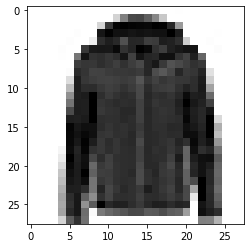

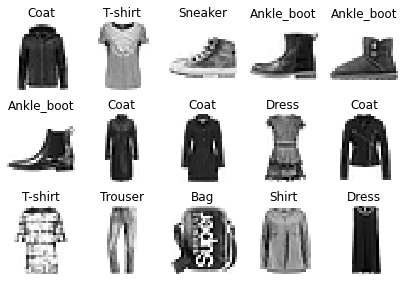

In [4]:

def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

def show_ims(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_cols * n_rows < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle_boot']
show_ims(3, 5, x_train, y_train, class_names)


In [5]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# relu: y = max(0, x)
#softmax: 将向量变成概率分布 x = [x1, x2, x3]
#         y = [e^x1/sum, e^x2/sum, e^x3/sum] sum = e^x1 + e^x2 + e^x3

#reason for sparse: y->index y->one_hot->[]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.layers


In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
type(history)


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7371 - accuracy: 0.7605 - val_loss: 0.5225 - val_accuracy: 0.8244
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4959 - accuracy: 0.8269 - val_loss: 0.4554 - val_accuracy: 0.8446
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4482 - accuracy: 0.8427 - val_loss: 0.4369 - val_accuracy: 0.8516
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4220 - accuracy: 0.8525 - val_loss: 0.4089 - val_accuracy: 0.8504
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4012 - accuracy: 0.8591 - val_loss: 0.3846 - val_accuracy: 0.8702
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3857 - accuracy: 0.8642 - val_loss: 0.3981 - val_accuracy: 0.8630
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3711 - accuracy: 0.8709 - val_loss: 0.3658 - val_accuracy:

tensorflow.python.keras.callbacks.History

In [8]:
history.history


{'accuracy': [0.7605090737342834,
  0.826909065246582,
  0.8427454829216003,
  0.8525272607803345,
  0.8591272830963135,
  0.8642363548278809,
  0.8708545565605164,
  0.873054563999176,
  0.8766909241676331,
  0.8793818354606628],
 'loss': [0.7370519042015076,
  0.49590158462524414,
  0.44819214940071106,
  0.4219750165939331,
  0.40122395753860474,
  0.3856954276561737,
  0.37106427550315857,
  0.35875236988067627,
  0.348598837852478,
  0.33888134360313416],
 'val_accuracy': [0.824400007724762,
  0.8446000218391418,
  0.8515999913215637,
  0.8503999710083008,
  0.870199978351593,
  0.8629999756813049,
  0.871399998664856,
  0.8751999735832214,
  0.8769999742507935,
  0.8808000087738037],
 'val_loss': [0.5225352644920349,
  0.4554418921470642,
  0.4368671476840973,
  0.4088708162307739,
  0.38455402851104736,
  0.39811035990715027,
  0.3657548129558563,
  0.35352206230163574,
  0.3489648699760437,
  0.342313289642334]}

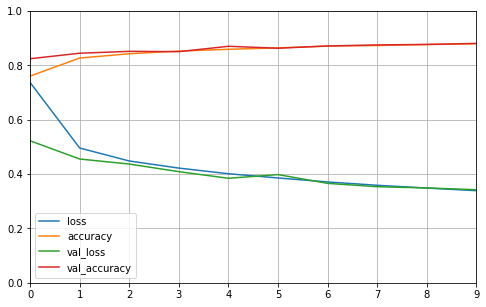

In [9]:

def plt_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8, 5])
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plt_learning_curves(history)